<a href="https://colab.research.google.com/github/Bayrem-ben/colab.github.io/blob/main/Projet_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imutils
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from google.colab.patches import cv2_imshow

In [ ]:
cha3b = os.path.join('/content/drive/My Drive/','cha3b.pdf')
elhayatalarabiya = os.path.join('/content/drive/My Drive/', 'elhayatalarabiya.pdf')
assabah = os.path.join('/content/drive/My Drive/', 'assabah.pdf')

In [ ]:
print(cha3b)

/content/drive/My Drive/cha3b.pdf


In [ ]:
!pip install fitz
!pip install PyMuPDF

In [ ]:
!pip install PyPDF2
!pip install pdf2image

In [ ]:
!pip install Wand
!pip install --upgrade convertapi
!pip install Flask

**PDF2IMG** 

In [ ]:
from flash import Flask, request, jsonify

app = Flask(__name__)

@app.route('/', methods=['GET', 'POST'])
def index():
    if (request.method == 'POST'):
      some_json = request.get_json()
    return 'Hello, World!'

if __name__ == '__main__':
  app.run(debug=True)

In [ ]:
import convertapi

convertapi.api_secret = '2JgFkr3oJjPcTxRy'
convertapi.convert('png', {'File': cha3b}, 
                   from_format = 'pdf').save_files('/content/drive/MyDrive/ImagesFromPDF')


def merger(output_path, input_paths):

    dictFiles = {}
    for i,path in enumerate(input_paths):
        dictFiles[f'File[{i}]'] = path

    convertapi.api_secret = 'my-api-secret'
    result = convertapi.convert('merge', dictFiles, from_format = 'pdf')
    result.save_files(output_path)

convertapi.exceptions.ApiError: Parameter validation error. Code: 4000. {'Files': ['Files array item count must be greater than 0.']}



In [ ]:
#!apt-get install libmagickwand-dev
from wand.image import Image as wi

PDFfile = wi(filename=cha3b,resolution=400)
Images = PDFfile.convert('jpg')
ImageSequence = 1

for img in PDFfile.sequence:
    Image = wi(image = img)
    Image.save(filename="ImagesFromPDF/"+str(ImageSequence)+".jpg")
    ImageSequence += 1

In [ ]:
from pdf2image import convert_from_path

pages = convert_from_path(cha3b)

count = 0
for page in pages:
     count +=1
     plt.show(page)
     #page.save('ImagesFromPDF/'+str(count)+'.jpg', 'JPEG')

In [ ]:
from PyPDF2 import PdfFileReader

with open('/content/drive/MyDrive/assabah.pdf', 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()

print(pdf)
print(information)
print(number_of_pages)

In [ ]:
import fitz
from IPython.display import Image, display

doc = fitz.open(cha3b)
page = doc.loadPage(0)  # number of page
pix = page.getPixmap()
output = "ImagesFromPDF/outfile.png"
#pix.writePNG(output)
print(pix)
plt.show(pix)
display(Image(pix))

In [ ]:
from PyPDF2 import PdfFileReader, PdfFileWriter

def extract_information(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()
    #txt = f
    """
    Information about {pdf_path}: 

    Author: {information.author}
    Creator: {information.creator}
    Producer: {information.producer}
    Subject: {information.subject}
    Title: {information.title}
    Number of pages: {number_of_pages}
    """

    text=''
    for i in range(0,pdf.numPages):
        # creating a page object
        pageObj = pdf.getPage(i)
        print(pageObj)
        # extracting text from page
        text=pageObj.extractText()
    print(text)

    return information


#if __name__ == '__main__':
path = cha3b
extract_information(path)

**SELECT_ARTICLE**

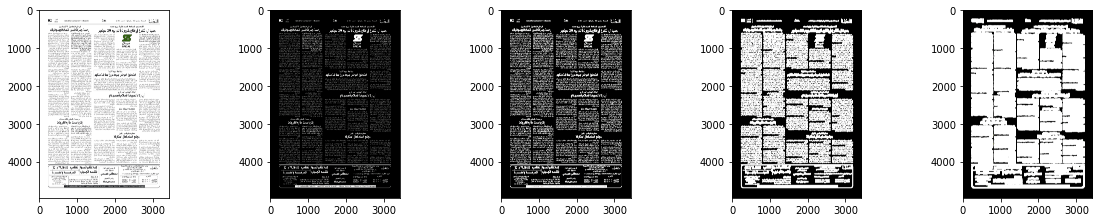

In [65]:
import sys
import numpy as np
import skimage.io
import skimage.filters
import cv2
import numpy as np
import matplotlib.pyplot as plt

l = []
image = cv2.imread('/content/drive/MyDrive/ImagesFromPDF/0002.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#l.append(img_gray)

blur = cv2.GaussianBlur(image, (5, 5), 0)
l.append(blur)
thresh4=cv2.threshold(blur,120, 255,cv2.THRESH_BINARY_INV)[1]
l.append(thresh4)

kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(thresh4,kernel,iterations = 1)
l.append(dilation)
dilation2 = cv2.dilate(thresh4,kernel,iterations = 5)
l.append(dilation2)
dilation3 = cv2.dilate(thresh4,kernel,iterations = 10)
l.append(dilation3)

plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(l[i])

plt.show()

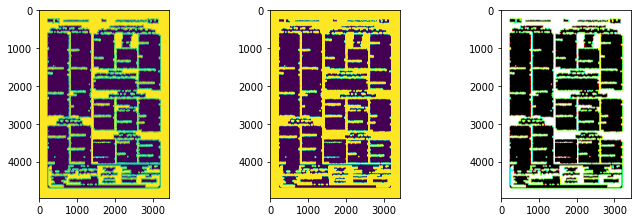

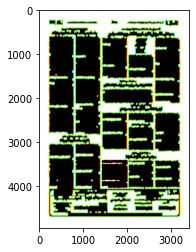

In [76]:
new_l = []
# using a findContours() function
thre=cv2.threshold(dilation3,120, 255,cv2.THRESH_BINARY_INV)[1]
img_gray = cv2.cvtColor(thre, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
new_l.append(img_gray)
new_l.append(threshold)

i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(thre, [contour], 0, (255, 0, 0), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])


# displaying the image after drawing contours
new_l.append(thre)
plt.figure(figsize=(20,20))
for i in range(len(new_l)):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(new_l[i])

plt.show()
plt.imshow(thre)

In [ ]:
import os
import cv2
import imutils
import numpy as np
from PIL import Image
from imutils import face_utils
import matplotlib.pyplot as plt

img = os.path.join('/content/drive/My Drive/','ImagesFromPDF/')

def countour_img(path):
  l = []
  dim = (400, 400)

  for fname in os.listdir(path):
        fpath = os.path.join(path, fname)
        image = cv2.imread(fpath)
        #image = cv2.resize(image, dim, Image.ANTIALIAS)

        #gray image conversion
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #applying edge detection
        edged = cv2.Canny(gray , 50, 255)
        #threshholding
        thresh=cv2.threshold(edged,50,255,cv2.THRESH_BINARY_INV)[1]
        #cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cv2.findContours(thresh.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #RETR_LIST #contours, _ 
        #clean concour
        cnts = imutils.grab_contours(cnts)
        #image = cv2.drawContours(image, cnts, -1, (0, 255, 0), -1) 
        l.append(cnts)        
  return l

img_tr = countour_img(img)

img_train = np.asarray(img_tr)

In [ ]:
import matplotlib.pyplot as plt

print(len(img_tr))
plt.imshow(img_tr[2])